In [187]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

np.set_printoptions(threshold=sys.maxsize)

In [188]:
def findCloseCentroid(X,centroids):
    idx=np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        tmp=np.sqrt(np.sum((X[i,0]-centroids[0,0])**2 + (X[i,1]-centroids[0,1])**2 ))
        idx[i]=0
        for j in range(1,centroids.shape[0]):
            if(tmp>np.sqrt(np.sum((X[i,]-centroids[j,0])**2 + (X[i,1]-centroids[j,1])**2 ))):
                tmp=np.sqrt(np.sum((X[i,]-centroids[j,0])**2 + (X[i,1]-centroids[j,1])**2 ))
                idx[i]=j
    return idx

In [189]:
def updateCentroids(X,idx,K):
    m,n=X.shape
    centroids=np.zeros((K,n))
    o=0
    sum_=np.zeros((1,3));
    for i in range(K):
        for j in range(m):
            if(idx[j]==i):
                sum_[0,:]+=X[j,:]
                o+=1
        centroids[i,:]=sum_/o
        o=0
        sum_=np.zeros((1,3));
    return centroids

In [190]:
def kmeans(X,centroids,idx,iters):
    for i in range(iters):
        idx=findCloseCentroid(X,centroids)
        centroids=updateCentroids(X,idx,K)
        print(img[i,:]) 
    return centroids,idx

In [195]:
K=16
permidx=np.random.permutation(img.shape[0])
centroids=img[permidx[:K],:]

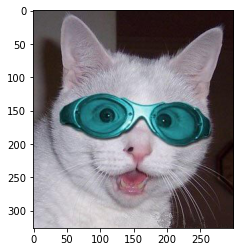

In [196]:
img=io.imread('cat.png')
rows=img.shape[0]
cols=img.shape[1]
plt.imshow(img)
img=img.reshape(rows*cols,img.shape[2])

In [197]:
K=16
permidx=np.random.permutation(img.shape[0])
centroids=img[permidx[:K],:]
idx=np.zeros(img.shape[0])
centroids,idx=kmeans(X=img,centroids=centroids,idx=idx,iters=10)
for i in range(img.shape[0]):
    img[i,:]=centroids[int(idx[i]),:]

<ipython-input-188-f38557605979>:7: RuntimeWarning: overflow encountered in ubyte_scalars
  if(tmp>np.sqrt(np.sum((X[i,]-centroids[j,0])**2 + (X[i,1]-centroids[j,1])**2 ))):
<ipython-input-188-f38557605979>:4: RuntimeWarning: overflow encountered in ubyte_scalars
  tmp=np.sqrt(np.sum((X[i,0]-centroids[0,0])**2 + (X[i,1]-centroids[0,1])**2 ))
<ipython-input-188-f38557605979>:8: RuntimeWarning: overflow encountered in ubyte_scalars
  tmp=np.sqrt(np.sum((X[i,]-centroids[j,0])**2 + (X[i,1]-centroids[j,1])**2 ))


[83 77 79]
[85 79 81]


<ipython-input-189-6f9eaebb2b10>:11: RuntimeWarning: invalid value encountered in true_divide
  centroids[i,:]=sum_/o


[86 80 82]
[85 81 82]
[82 80 81]
[82 80 81]
[82 82 82]
[83 83 83]
[82 82 82]
[82 82 82]


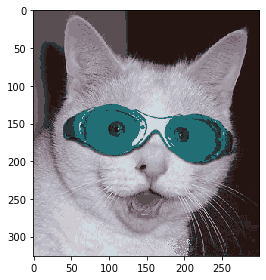

In [198]:
img=img.reshape((rows,cols,3))
io.imsave('cat_compressed.png', img)
io.imshow(img)
io.show()